# Homework \#4
Due July 18 @ 11:59pm

## Submission requirements
Upload a **single PDF or HTML file** of your IJulia notebook for this entire assigment. Clearly denote which question each section of your file corresponds to.

## Problem 1 -- Sparse Solutions


The following set of four equations with six  variables has infinitely many solutions. (It is an underdetermined system.)

\begin{align*}
3 x_1 + 3 x_2 + 4 x_3 \phantom{- 9 x_4 + 3x_5} + 6x_6  & = & 15\\
2x_1 - 6 x_2 - x_3 - 5 x_4 + 2x_5 - x_6 & = & 10\\
x_1 - x_2 + x_3  \phantom{+2x_4} - 3x_5 + x_6 & = & 2\\
2x_1 \phantom{+2x_2} + x_3 - x_4  + 6x_5 \phantom{+2x_5} & = & 0 
\end{align*}

In machine learning applications, it is often desirable for statistical purposes to find a solution to a set of
equations that has a small number of nonzero values (i.e., "sparse" solutions). As we learned in lecture, using the one-norm in the objective of a least-squares-type problem is one way to emphasize sparse solutions. 
Thus, we wish to minimize:

$ \sum_{i=1}^6 | x_i | $

for $x$ that satisfies the constraints above. Note that the decision variables $x_i$ are __unrestricted in sign__ (in other words, they are free).

(a) Write a _linear programming_ instance that will find a solution that minimizes the sum of absolute values. 


(b) Create the instance you wrote down for part (a) in Julia/JuMP and solve it. What is the minimum sum of absolute values that can be achieved?  What are the corresponding values for $x$?


(c) Repeat (a) and (b), but minimizing the the _largest_ absolute value of any of the decision variables (infinity norm).

(d) Now we will generalize our solution to (a) and (b). Let $N = \{1, 2, \ldots ,n\}$.  For each $j \in N$ you have a free decision variable $x_j$.  You are given a set of equations containing these decision variables as follows:

$\sum_{j \in N} a_{ij} x_j = b_i \qquad \forall i \in M $

where the system is underdetermined.

Write a general _linear_ program to minimize 
$  \sum_{i \in N} |x_i| $

subject to the given constraints. Use the code given below to build and solve a general instance in Julia. How many variables have non-zero value in the optimal solution? (You do not need to submit the individual variable values, just the number of variables that are non-zero.)

(e) Solve the same problem but minimize the infinity norm. How does the number of non-zero x-values in the solution change? You do not need to give the math model for this question; just give the Julia implementation and report the new number of non-zero x-values.

# Solution 1a
(a) Write a _linear programming_ instance that will find a solution that minimizes the sum of absolute values. 


\begin{equation*}
\min\sum _{i=1}^{6} t_{i}
\end{equation*}
\begin{gather*}
s.t.\ -t_{i} \ \leqslant \ \tilde{a}_{i}^{T} x\ -\ b_{i} \ \leqslant \ t_{i} \ \ \forall i\\
t_{i} \ \geqslant \ x_{i}\\
t_{i} \ \geqslant \ -x_{i}\\
x_{1} ,x_{2} ,x_{3} ,x_{4} ,x_{5} ,x_{6} \ unrestricted\\
\end{gather*}

# Solution 1b
(b) Create the instance you wrote down for part (a) in Julia/JuMP and solve it. What is the minimum sum of absolute values that can be achieved?  What are the corresponding values for $x$?

In [303]:
# Solution 1b
using JuMP, Clp

# Coefficient matrix
A = [3  3  4  0  0  6 
     2 -6 -1 -5  2 -1
     1 -1  1  0 -3  1
     2  0  1 -1  6  0] 

# Right hand side vector
b = [15; 10; 2; 0]

# The number of x cols
cols = 1:6
rows = 1:4

m = Model(Clp.Optimizer)

# x's are the solutions to the linear system
@variable(m, x[cols])
@variable(m, t[cols])

# The objective is to minimize the sum of the squares of the x's
@objective(m, Min, sum(t[i] for i in cols))

# The constraints are the linear system
@constraint(m, constr1[i in cols], t[i] >= -x[i])
@constraint(m, constr2[i in cols], t[i] >= x[i])
@constraint(m, constr3[j in rows], sum(A[j,i] * x[i] for i in cols) == b[j])

optimize!(m)
one_norm = objective_value(m)

println("The minimum sum of absolute values that can be achieved = ", one_norm)
println("The corresponding x values are: ")
for i in cols
    println("x_", i, " = ", value(x[i]))
end
print("\n")

The minimum sum of absolute values that can be achieved = 7.917808219178078
The corresponding x values are: 
x_1 = -1.410958904109588
x_2 = 0.0
x_3 = 0.0
x_4 = -3.232876712328765
x_5 = -0.06849315068493148
x_6 = 3.205479452054794

Coin0506I Presolve 16 (0) rows, 12 (0) columns and 43 (0) elements
Clp0006I 0  Obj 0 Primal inf 4.833333 (3) Dual inf 0.0599994 (6) w.o. free dual inf (0)
Clp0006I 16  Obj 7.9178082
Clp0006I 16  Obj 2.3630137e+10 Primal inf 9.6118721e+10 (2) Dual inf 5.8831963e+13 (6) w.o. free dual inf (4)
Clp0006I 19  Obj 7.9178082
Clp0000I Optimal - objective value 7.9178082
Clp0032I Optimal objective 7.917808219 - 19 iterations time 0.002


# Solution 1c
(c) Repeat (a) and (b), but minimizing the the _largest_ absolute value of any of the decision variables (infinity norm).

\begin{gather*}
\min t\\
s.t.\ -t\ \leqslant \ \tilde{a}_{i}^{T} x\ -\ b_{i} \ \leqslant \ t\ \ \forall i\\
t\ \geqslant \ x_{i}\\
t\ \geqslant \ -x_{i}\\
x_{1} ,x_{2} ,x_{3} ,x_{4} ,x_{5} ,x_{6} \ unrestricted
\end{gather*}

In [304]:
# Solution 1c
using JuMP, Clp

# Coefficient matrix
A = [3  3  4  0  0  6 
     2 -6 -1 -5  2 -1
     1 -1  1  0 -3  1
     2  0  1 -1  6  0] 

# Right hand side vector
b = [15; 10; 2; 0]

# The number of x cols
cols = 1:6
rows = 1:4

m = Model(Clp.Optimizer)

# Note: now t is a single variable, not a vector.
@variable(m, t)
@variable(m, x[cols])

# The objective function now is to just minimize t.
@objective(m, Min, t)

# Same as above, but now t is a single variable
@constraint(m, constr1[i in cols], t >= -x[i])
@constraint(m, constr2[i in cols], t >= x[i])
@constraint(m, constr3[j in rows], sum(A[j,i] * x[i] for i in cols) == b[j])

optimize!(m)
inf_norm = objective_value(m)

println("The minimimum of the largest absolute value of any of the decision cols (infinity norm) = ", inf_norm)
println("The corresponding x values are: ")
for i in cols
    println("x_", i, " = ", value(x[i]))
end
print("\n")

The minimimum of the largest absolute value of any of the decision cols (infinity norm) = 3.1055276381909542
The corresponding x values are: 
x_1 = 1.6432160804020097
x_2 = 1.28643216080402
x_3 = -3.1055276381909542
x_4 = -3.1055276381909542
x_5 = -0.5477386934673366
x_6 = 3.1055276381909542

Coin0506I Presolve 16 (0) rows, 7 (0) columns and 43 (0) elements
Clp0006I 0  Obj 0 Primal inf 4.833333 (3) Dual inf 0.0099999 (1) w.o. free dual inf (0)
Clp0006I 10  Obj 3.1055276
Clp0000I Optimal - objective value 3.1055276
Clp0032I Optimal objective 3.105527638 - 10 iterations time 0.002


# Solution 1d
(d) Now we will generalize our solution to (a) and (b). Let $N = \{1, 2, \ldots ,n\}$.  For each $j \in N$ you have a free decision variable $x_j$.  You are given a set of equations containing these decision variables as follows:

$\sum_{j \in N} a_{ij} x_j = b_i \qquad \forall i \in M $

where the system is underdetermined.

Write a general _linear_ program to minimize 
$  \sum_{i \in N} |x_i| $

\begin{align*}
\min \quad \sum_{j \in N} (p_j + n_j) \\
\mbox{s.t.}\quad  \sum_{j \in N} a_{ij} x_j  & = b_i \qquad \forall i \in M\\
x_j & = p_j - n_j \qquad \forall j \in N\\
p_j, n_j & \geq 0 \qquad \forall j \in N\\
x_j & \quad \mbox{free} \qquad \forall j \in N
\end{align*}


In [307]:
# Solution 1d
N = 300 # number of variables
M = 200 # number of constraints

using Distributions, Random
s = 345984 # set seed to generate same random values each time
Random.seed!(s)

A = [round(rand(Uniform(-20,20))) for i in 1:M, j in 1:N] # create random coefficient array
b = [round(rand(Uniform(-10,10))) for i in 1:M] # create random right-hand-side array
;

using JuMP, Clp

m = Model(Clp.Optimizer)

# Note: now t is a single variable, not a vector.
@variable(m, t[1:N])
@variable(m, x[1:N])

# The objective function now is to just minimize t.
@objective(m, Min, sum(t[i] for i in 1:N))

# Same as above, but now t is a single variable
@constraint(m, constr1[i in 1:N], t[i] >= -x[i])
@constraint(m, constr2[i in 1:N], t[i] >= x[i])
@constraint(m, constr3[j in 1:M], sum(A[j,i] * x[i] for i in 1:N) == b[j])

optimize!(m)

println("The solution to the LP is = ", objective_value(m))

count = 0
for i in 1:N
    if value(x[i]) == 0
        count +=1
    end
end

println(N-count, " variables have a non-zero value.\n")

The solution to the LP is = 8.514161360604414
200 variables have a non-zero value.

Coin0506I Presolve 800 (0) rows, 600 (0) columns and 59761 (0) elements
Clp0006I 0  Obj 0 Primal inf 47.399981 (189) Dual inf 13.416378 (300) w.o. free dual inf (0)
Clp0006I 91  Obj -4.0696437e+12 Primal inf 4.7710982e+13 (291) Dual inf 9.3467432 (209) w.o. free dual inf (0)
Clp0006I 91  Obj -4.0696437e+12 Primal inf 4.7710982e+13 (291) Dual inf 2.1035684e+15 (600) w.o. free dual inf (91)
Clp0029I End of values pass after 91 iterations
Clp0006I 91  Obj -4.0696437e+12 Primal inf 4.7710982e+13 (291) Dual inf 2.1035684e+15 (600) w.o. free dual inf (91)
Clp0006I 136  Obj -3.0932828e+12 Primal inf 3.1524455e+13 (262) Dual inf 3.9176555e+15 (547) w.o. free dual inf (83)
Clp0006I 206  Obj -2.3923158e+12 Primal inf 1.8510536e+13 (233) Dual inf 3.9254913e+15 (474) w.o. free dual inf (80)
Clp0006I 248  Obj -1.7065842e+12 Primal inf 1.2846718e+13 (210) Dual inf 3.9818737e+15 (425) w.o. free dual inf (73)
Clp0006I 

# Solution 1e

(e) Solve the same problem but minimize the infinity norm. How does the number of non-zero x-values in the solution change? You do not need to give the math model for this question; just give the Julia implementation and report the new number of non-zero x-values.

In [314]:
# Solution 1e
using JuMP, Clp

m = Model(Clp.Optimizer)

# Note: now t is a single variable, not a vector.
@variable(m, t)
@variable(m, x[1:N])

# The objective function now is to just minimize t.
@objective(m, Min, t)

# Same as above, but now t is a single variable
@constraint(m, constr1[i in 1:N], t >= -x[i])
@constraint(m, constr2[i in 1:N], t >= x[i])
@constraint(m, constr3[j in 1:M], sum(A[j,i] * x[i] for i in 1:N) == b[j])

optimize!(m)

println("The minimized infinity norm = ", objective_value(m))
count = 0
for i in 1:N
    if value(x[i]) == 0
        count +=1
    end
end

println(N-count, " variables have a non-zero value.")

println("There are much more non-zero x-values in the solution! In 1d we had ", 200, " variables that were non-zero and for 1e we have ", N-count, " values that are non-zero.\n")

The minimized infinity norm = 0.06824148005994941
300 variables have a non-zero value.
There are much more non-zero x-values in the solution! In 1d we had 200 variables that were non-zero and for 1e we have 300 values that are non-zero.

Coin0506I Presolve 800 (0) rows, 301 (0) columns and 59761 (0) elements
Clp0006I 0  Obj 0 Primal inf 47.399981 (189) Dual inf 0.04472126 (1) w.o. free dual inf (0)
Clp0006I 44  Obj 0 Primal inf 159.78343 (200)
Clp0006I 112  Obj 0 Primal inf 701.06682 (200)
Clp0006I 154  Obj 284.71277 Primal inf 45821.31 (65)
Clp0006I 155  Obj 1102.4552 Primal inf 140662.03 (57)
Clp0006I 156  Obj 1439.8207 Primal inf 138522.87 (51)
Clp0006I 157  Obj 1625.2092 Primal inf 138249.64 (48)
Clp0006I 158  Obj 3110.1161 Primal inf 257756.36 (47)
Clp0006I 159  Obj 4547.2833 Primal inf 379048.39 (46)
Clp0006I 159  Obj 4547.2833 Primal inf 379048.39 (46)
Clp0006I 194  Obj 1.4166728e+15 Primal inf 1.1924218e+17 (46) Dual inf 496009.34 (76)
Clp0006I 194  Obj -2.3368962e+16 Primal in

## Problem 2 -- Curve fitting, and variations thereof

Suppose you are flying a new drone around a hilly area outside of town. You want to maintain a consistent distance between the drone and the ground, so the drone needs to increase altitude when it encounters a hill and decrease altitude when it encounters a valley. You have already mapped out the area where you'll be flying, so you have an estimate of the desired altitude of the drone at 300 distinct points on the route (based on that area's elevation). We would like to plan our speed changes based on the elevation analysis we have already performed. Altitude changes are measured in discrete increments (in feet); a altitude change of 1 means the drone has increased its altitude by 1 foot. An altitude change of -1 means the drone has decreased its altitude by 1 foot. The desired altitude at each point in the flight path is given by the plot produced by the code snippet below. The drone starts and ends at your current elevation, which you can denote as 0 feet.

Abrupt changes in altitude are hard on the drone and use up more of its battery. Thus, instead of exactly matching the altitudes given below, you would like to find an alternative sequence of changes that gives a tradeoff between matching the desired altitudes in the graph below and a sequence of changes that produces desirable properties. In particular, you will be trying to ensure the altitude transitions are smooth (not too abrupt). 

Denote the current altitude at each discrete time by $u_1,u_2,...,u_{300}$. You can then characterize smoothness by using the sum of the squared differences between each successive altitude:

$$R(u) = (u_2-u_1)^2 + (u_3-u_2)^2 + \dotsm + (u_{300}-u_{299})^2$$

Of course, the smaller you make $R(u)$ the smoother the transitions will be. 

(a) Find a set of optimal sequences of altitudes that explores the tradeoff between matching the desired seuqence given in the graph below and keeping the transitions smooth. Measure the deviations from the desired altitudes using a 2-norm. Include a plot comparing the desired altitudes to at least 4 different smoothed versions. Use regularization weights of 0.1, 1, 10, and at least one other weight that you choose. Also plot your solutions on a Pareto curve. To "fill in" the rest of the curve, either draw or describe in a few words what you think the Pareto curve would look like if you filled in all the points. 

(b) Now suppose you have been given a challenge by one of your friends: you can only change altitude according to a polynomial curve of degree 4 where the altitude is a function of time. Perform polynomial regression on the data given below for a polynomial of degree 4. What are the coefficients of your polynomial? On a separate graph from the graph you created in part (a), graph the polynomial against the desired altitudes. Does it look like a good fit for your data?

(c) What is the total 2-norm error between the desired altitudes and the altitudes by your models in part (a) and part (b)? In a broad sense, how do they compare? What conclusions can you draw by comparing these two techniques?


Use the code provided below to generate data for your model.

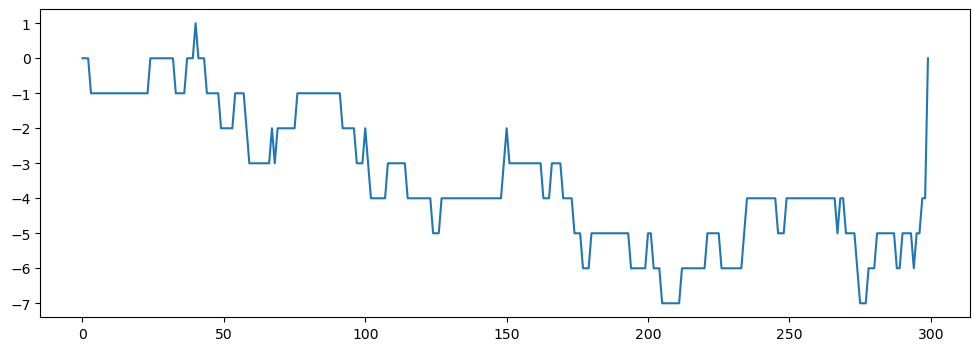

In [4]:
using Random
# set a seed so we get the same output every time
seed = 632984
Random.seed!(seed)
# initialize the vector of altitudes
val = 0; u = zeros(300); u[1] = val
# set a density that determines how often the altitude changes
# low density corresponds to infrequent altitude changes
dens = 0.1
# build altitude vector for all times between now and time 299
for i in 2:299
    # if a uniform(0,1) variable is < density
    if rand() < dens
        # increase the altitude by 1 foot
        val = val + 1
        u[i] = val
        # if a uniform(0,1) variable is >= 1 - density
    elseif rand() >= 1.0-dens
        # decrease the altitude by 1 foot
        val = val - 1
        u[i] = val
    else 
        # otherwise the altitude stays the same
        u[i] = val
    end
end
# the first and final altitude must be 0
u[1] = 0
u[300] = 0
T = length(u) # number of points where altitude changes
# plot the altitudes (your figure should match the one in the assignment!)
using PyPlot
figure(figsize=(12,4))
plot(u,"-");

# Solution 2a
(a) Find a set of optimal sequences of altitudes that explores the tradeoff between matching the desired sequence given in the graph below and keeping the transitions smooth. Measure the deviations from the desired altitudes using a 2-norm. Include a plot comparing the desired altitudes to at least 4 different smoothed versions. Use regularization weights of 0.1, 1, 10, and at least one other weight that you choose. Also plot your solutions on a Pareto curve. To "fill in" the rest of the curve, either draw or describe in a few words what you think the Pareto curve would look like if you filled in all the points. 


\begin{gather*}
\min\sum _{i\ =\ 1}^{300}( x_{i}{}_{+}{}_{1} \ -\ x_{i})^{2} \ +\ \lambda ||\ x_{i} \ -\ u_{i} ||\\
s.t.\ x_{1} =x_{3}{}_{0}{}_{0} =0\\
\end{gather*}

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      599

Total number of variables............................:      300
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  4.7110000e+02 0.00e+00 1.40e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

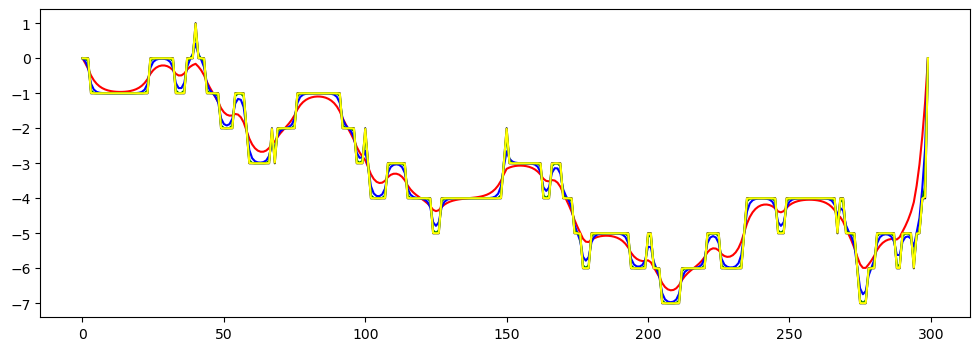

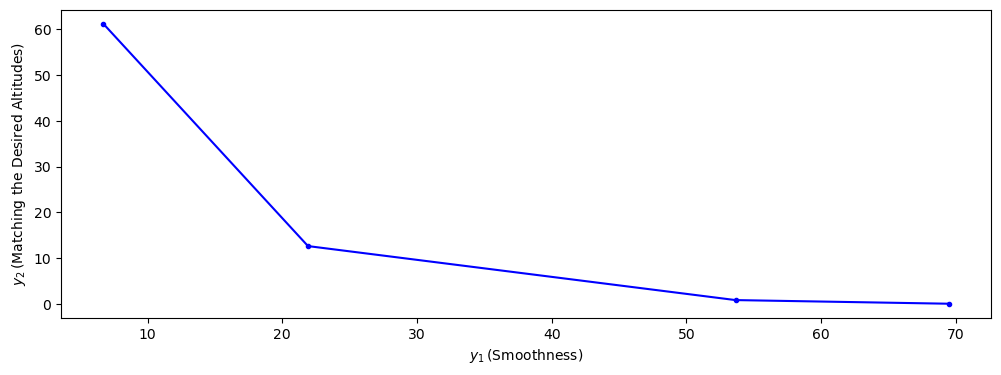

In [5]:
# create a function that takes a value for λ then solves and reports solution of tradeoff problem
using JuMP, Ipopt, PyPlot

T = 1:300

function solveOpt(λ)

    m = Model(Ipopt.Optimizer)
    
#   The variable x_t is the drone position at time t
    @variable(m, x[T])  # position at each time
    
#   Constraint: x_1 = x_300 = 0
    @constraint(m, x[1] == 0)
    @constraint(m, x[300] == 0)

#   Objective Function
    @objective(m, Min, sum((x[i+1]-x[i])^2 for i in 1:299) + λ*sum((x.-u).^2))

    optimize!(m)
    
    y1 = value.(sum((x[i+1]-x[i])^2 for i in 1:299))
    
    y2 = value.(sum((x.-u).^2))
    
    xopt = value.(x)

    return (xopt, y1, y2)
    
end
;

(xopt1, y11, y12)= solveOpt(.1)
(xopt2, y21, y22)= solveOpt(1)
(xopt3, y31, y32)= solveOpt(10)
(xopt4, y41, y42)= solveOpt(100)

lambda_tenth = xopt1
lambda_one = xopt2
lambda_ten = xopt3
lambda_hundred = xopt4

figure(figsize=(12,4))
plot(u,"-", color = :black);
plot(lambda_tenth, "-", color = :red)
plot(lambda_one, "-", color = :blue)
plot(lambda_ten, "-", color = :green)
plot(lambda_hundred, "-", color = :yellow)

# Plot the pareto curve for the tradeoff problem
Npts = 4
y1 = zeros(Npts)
y2 = zeros(Npts)

y1[1] = y11
y1[2] = y21
y1[3] = y31
y1[4] = y41

y2[1] = y12
y2[2] = y22
y2[3] = y32
y2[4] = y42


using PyPlot
figure(figsize=(12,4))
plot(y1, y2 , "b.-")
xlabel(L"y_1\, (\sf Smoothness)")
ylabel(L"y_2\, (\sf Matching\ the\ Desired\ Altitudes)")
println("\nIf the pareto curve was filled (had more points) I would expect that the graph would be must more smooth and less rigid.")

# Solution 2b
(b) Now suppose you have been given a challenge by one of your friends: you can only change altitude according to a polynomial curve of degree 4 where the altitude is a function of time. Perform polynomial regression on the data given below for a polynomial of degree 4. What are the coefficients of your polynomial? On a separate graph from the graph you created in part (a), graph the polynomial against the desired altitudes. Does it look like a good fit for your data?



This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        5
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       15

Total number of variables............................:        5
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  4.7110000e+03 0.00e+00 4.77e+04  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

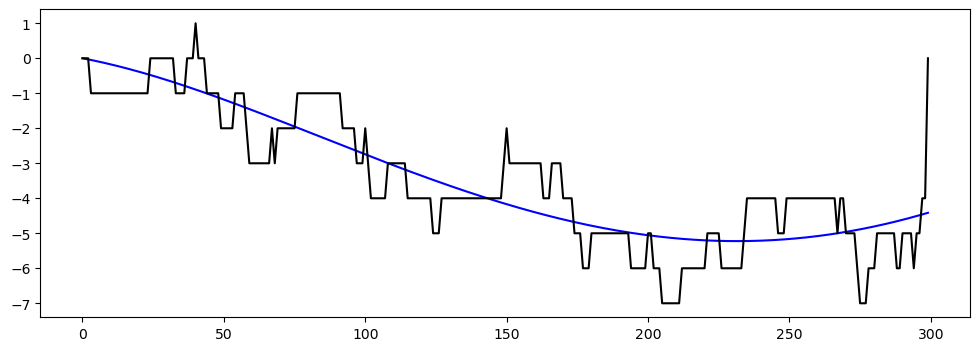

In [7]:
using JuMP, Ipopt, LinearAlgebra

param = zeros(300, 5)
poly = zeros(300)

k = 5
for i in 1:300
    for j in 1:k
        param[i, j] = i^(j-1)
    end
end

m = Model(Ipopt.Optimizer)

@variable(m, x[1:5])

@constraint(m, cond_sum, sum(x[i] for i in 1:k) == 0)

@objective(m, Min, sum(((-1*u[i]) + param[i, 5] * x[1] + param[i, 4] * x[2] + param[i, 3] * x[3] + param[i, 2] * x[4] + x[5])^2 for i in T))

optimize!(m)

coefficients = value.(x)

for t in T
    poly[t] = coefficients[1] * t^4 + coefficients[2] * t^3 + coefficients[3] * t^2 + coefficients[4] * t + coefficients[5]
end

println("\nThe coefficients for the polynomial are:")
for c in coefficients
    println("-> ", c)
end

# Plot
using PyPlot
figure(figsize= (12,4))
plot(poly, "-", color= :blue)
plot(u, "-", color = :black)

println("\n If this was actually to be used for drones, then their would likely be issues with the drone being at too low of an elevation. It looks like a decent fit for our data, but does not meet the requirements that the drone starts and ends at 0.")

# Solution 2c
(c) What is the total 2-norm error between the desired altitudes and the altitudes by your models in part (a) and part (b)? In a broad sense, how do they compare? What conclusions can you draw by comparing these two techniques?

In [9]:
two_norm_2a = sum((lambda_tenth.-u).^2)
two_norm_2b = sum((poly.-u).^2)

println("The total 2-norm error between the desired altitudes (u) and the models in part a (with lambda = 0.1) and part b is: ")
println("Part a-> ", two_norm_2a)
println("Part b-> ", two_norm_2b)


println("\nBy looking at these two techniques, it is clear that performing the tradeoff analysis gets us closer to the desired
altitudes. When comparing these techniques, it looks like the tradeoff analysis almost overfits the desired altitudes where as the polynomial regression results in more rounded edges. The reason this may be the case is that our model for 2a is non-linear and the model in 2b uses polynomial regression which is a form of linear regression.")

The total 2-norm error between the desired altitudes (u) and the models in part a (with lambda = 0.1) and part b is: 
Part a-> 61.210972845124296
Part b-> 267.315785387763

By looking at these two techniques, it is clear that performing the tradeoff analysis gets us closer to the desired
altitudes. When comparing these techniques, it looks like the tradeoff analysis almost overfits the desired altitudes where as the polynomial regression results in more rounded edges. The reason this may be the case is that our model for 2a is non-linear and the model in 2b uses polynomial regression which is a form of linear regression.
